# Clustering

이해원

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

- final :           범주형 원핫인코딩X
- final_enco : 범주형 원핫인코딩O

In [4]:
pd.set_option('display.max_columns', None)
fin = pd.read_csv('final_enco_업권분류.csv')

In [5]:
display(fin.info())
display(fin.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58427 entries, 0 to 58426
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   JOIN_SN         58427 non-null  int64  
 1   POL_SN          58427 non-null  int64  
 2   GENDER          58427 non-null  int64  
 3   AGE_GROUP       58427 non-null  int64  
 4   reduce_GBN_CD   58427 non-null  int64  
 5   reduce_STAT_CD  58427 non-null  int64  
 6   CT_CHNL_CD      58427 non-null  int64  
 7   CT_PY_AMT       58427 non-null  int64  
 8   CT_PY_CYCLE_CD  58427 non-null  int64  
 9   CT_PY_PD        58427 non-null  int64  
 10  mean_AMT        58427 non-null  float64
 11  GBN_CD_1        58427 non-null  int64  
 12  GBN_CD_2        58427 non-null  int64  
 13  GBN_CD_3        58427 non-null  int64  
 14  GBN_CD_4        58427 non-null  int64  
 15  총지급금액           58427 non-null  int64  
 16  총지급 건수          58427 non-null  int64  
 17  기타              58427 non-null 

None

,JOIN_SN,POL_SN,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,연령대_0,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7,연령대_8,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,채널_1,채널_2,채널_3,채널_4,채널_5,채널_6,채널_7,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2,업권
0,15110,2197182,2,2,7,1,4,5000,1,0,5000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,2
1,56423,254040,2,2,1,1,1,170,2,5,170.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,2
2,1659127,5420542,2,4,7,1,5,180,2,3,180.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,817293,5884271,1,4,6,4,7,110,1,0,110.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1
4,798115,6197631,1,5,3,1,1,50,2,20,50.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0


# (폐기) 1. 총지급 건수 != 0

In [6]:
fin['총지급 건수'].value_counts()

총지급 건수
0     52197
1      2689
2      1448
3       733
4       475
5       270
6       213
7       126
8        86
9        44
10       36
11       31
12       19
13       11
17        8
14        8
16        6
15        6
18        3
22        3
24        2
21        2
19        2
20        2
27        2
31        1
71        1
41        1
39        1
25        1
Name: count, dtype: int64

In [7]:
fin_not0 = fin[fin['총지급 건수'] != 0]
fin_not0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6230 entries, 8 to 58354
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   JOIN_SN         6230 non-null   int64  
 1   POL_SN          6230 non-null   int64  
 2   GENDER          6230 non-null   int64  
 3   AGE_GROUP       6230 non-null   int64  
 4   reduce_GBN_CD   6230 non-null   int64  
 5   reduce_STAT_CD  6230 non-null   int64  
 6   CT_CHNL_CD      6230 non-null   int64  
 7   CT_PY_AMT       6230 non-null   int64  
 8   CT_PY_CYCLE_CD  6230 non-null   int64  
 9   CT_PY_PD        6230 non-null   int64  
 10  mean_AMT        6230 non-null   float64
 11  GBN_CD_1        6230 non-null   int64  
 12  GBN_CD_2        6230 non-null   int64  
 13  GBN_CD_3        6230 non-null   int64  
 14  GBN_CD_4        6230 non-null   int64  
 15  총지급금액           6230 non-null   int64  
 16  총지급 건수          6230 non-null   int64  
 17  기타              6230 non-null   int64

업권 나누기

- 0 : 신협
- 1 : 손보
- 2 : 생보

In [8]:
fin_not0[['업권']].value_counts()

업권
1     4587
2     1406
0      237
Name: count, dtype: int64

(1) 손해보험 = 1   (4587건)

In [9]:
fin_not0 = fin_not0[fin_not0['업권'] == 1].reset_index(drop=True)
fin_not0.head()

,JOIN_SN,POL_SN,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,연령대_0,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7,연령대_8,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,채널_1,채널_2,채널_3,채널_4,채널_5,채널_6,채널_7,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2,업권
0,797509,9351218,1,3,3,1,2,60,2,20,59.0,1,1,1,1,190,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1
1,305755,9817732,2,5,3,1,6,37,2,20,37.0,1,1,1,0,4907,13,0,0,0,0,13,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1
2,1276659,3120785,2,4,2,1,3,85,2,20,85.0,1,1,1,0,1160,2,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1
3,818304,5686072,1,4,2,1,1,120,2,63,120.0,1,1,1,1,989,9,0,0,0,0,9,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,1557600,6319159,2,2,3,1,99,69,2,20,65.0,1,1,1,0,434,5,0,0,0,0,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1


In [34]:
fin_not0.columns

Index(['JOIN_SN', 'POL_SN', 'CT_RLPS_GBN_CD', 'GENDER', 'AGE', 'AGE_GROUP',
       'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD', 'CT_PY_AMT',
       'CT_PY_CYCLE_CD', 'CT_PY_PD', 'mean_AMT', 'GBN_CD_1', 'GBN_CD_2',
       'GBN_CD_3', 'GBN_CD_4', '총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원',
       '실손', '자동차', '진단/통원', '화재/재물', '업권'],
      dtype='object')

In [10]:
drop_col = ['JOIN_SN', 'POL_SN', 'CT_RLPS_GBN_CD',
            'AGE', 'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD', 'CT_PY_AMT',
            'mean_AMT', '업권']

fin1 = fin_not0.drop(columns=drop_col)
fin1.head()

KeyError: "['CT_RLPS_GBN_CD', 'AGE'] not found in axis"

In [48]:
k = 5
kmeans1 = KMeans(n_clusters=k, random_state=42)
kmeans1.fit(fin1)

fin1['군집'] = kmeans1.labels_

In [49]:
fin1.head()

,GENDER,AGE_GROUP,CT_PY_CYCLE_CD,CT_PY_PD,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,군집
0,1,3,2,20,1,1,1,1,190,1,0,0,0,0,1,0,0,0,0
1,2,5,2,20,1,1,1,0,4907,13,0,0,0,0,13,0,0,0,3
2,2,4,2,20,1,1,1,0,1160,2,0,0,0,0,2,0,0,0,0
3,1,4,2,63,1,1,1,1,989,9,0,0,0,0,9,0,0,0,0
4,2,2,2,20,1,1,1,0,434,5,0,0,0,0,5,0,0,0,0


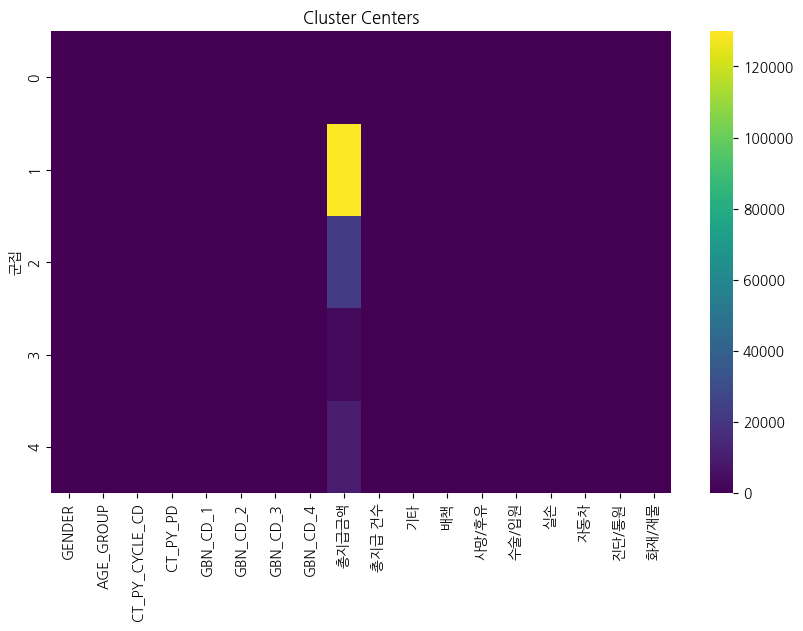

In [50]:
cluster_centers = fin1.groupby('군집').mean()
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers, cmap='viridis')
plt.title('Cluster Centers')
plt.show()

In [46]:
from sklearn.metrics.pairwise import cosine_similarity

In [47]:
cosine_sim1 = cosine_similarity(fin1)

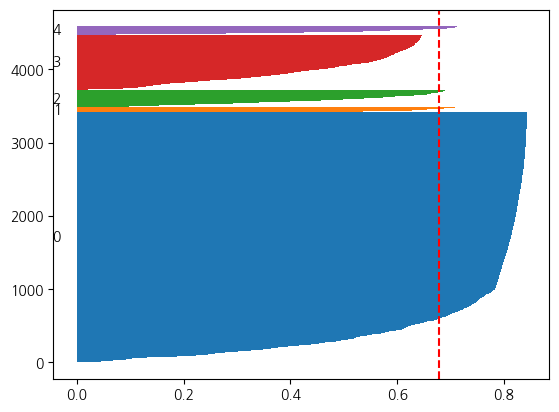

In [52]:
k=5

fig, ax = plt.subplots(1, 1)
kmeans1 = KMeans(n_clusters=k, random_state=42).fit(cosine_sim1)
silhouette_vals = silhouette_samples(cosine_sim1, kmeans1.labels_)
y_ticks = []
y_lower = y_upper = 0

for c_num in np.unique(kmeans1.labels_):
    cluster_silhouette_vals = silhouette_vals[kmeans1.labels_==c_num]
    y_upper += len(cluster_silhouette_vals)
    cluster_silhouette_vals.sort()

    ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    ax.text(-0.03, (y_lower + y_upper) / 2, str(c_num), ha='right', va='center')
    y_lower += len(cluster_silhouette_vals)
    
ax.axvline(np.mean(silhouette_vals), color="red", linestyle="--")

# 2. 총지급 건수 ==  0

In [11]:
fin_only0 = fin[fin['총지급 건수'] == 0]
fin_only0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52197 entries, 0 to 58426
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   JOIN_SN         52197 non-null  int64  
 1   POL_SN          52197 non-null  int64  
 2   GENDER          52197 non-null  int64  
 3   AGE_GROUP       52197 non-null  int64  
 4   reduce_GBN_CD   52197 non-null  int64  
 5   reduce_STAT_CD  52197 non-null  int64  
 6   CT_CHNL_CD      52197 non-null  int64  
 7   CT_PY_AMT       52197 non-null  int64  
 8   CT_PY_CYCLE_CD  52197 non-null  int64  
 9   CT_PY_PD        52197 non-null  int64  
 10  mean_AMT        52197 non-null  float64
 11  GBN_CD_1        52197 non-null  int64  
 12  GBN_CD_2        52197 non-null  int64  
 13  GBN_CD_3        52197 non-null  int64  
 14  GBN_CD_4        52197 non-null  int64  
 15  총지급금액           52197 non-null  int64  
 16  총지급 건수          52197 non-null  int64  
 17  기타              52197 non-null  int6

업권 나누기

In [12]:
fin_only0['업권'].value_counts()

업권
1    28233
2    20341
0     3623
Name: count, dtype: int64

## (1) 손해보험 = 1 (28233건)

In [13]:
fin_only0_1 = fin_only0[fin_only0['업권'] == 1].reset_index(drop=True)
fin_only0_1.head()

,JOIN_SN,POL_SN,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,연령대_0,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7,연령대_8,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,채널_1,채널_2,채널_3,채널_4,채널_5,채널_6,채널_7,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2,업권
0,817293,5884271,1,4,6,4,7,110,1,0,110.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1
1,1875818,6530014,1,6,5,1,1,15,2,10,15.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1
2,1544628,7514669,1,2,3,1,3,140,2,20,140.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
3,111496,9524202,1,5,5,2,6,280,1,0,280.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1
4,52630,7313737,2,5,2,1,1,88,2,20,88.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1


In [18]:
fin_only0_1.describe(include='all')

,JOIN_SN,POL_SN,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,연령대_0,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7,연령대_8,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,채널_1,채널_2,채널_3,채널_4,채널_5,채널_6,채널_7,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2,업권
count,2.823300e+04,2.823300e+04,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.0,28233.0,28233.0,28233.0,28233.0,28233.0,28233.0,28233.0,28233.0,28233.0,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.000000,28233.0
mean,9.782206e+05,5.002315e+06,1.497857,4.188680,4.062197,1.370878,6.544257,102.428187,1.945312,17.633620,104.333444,0.904296,0.678568,0.665569,0.663939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003648,0.019941,0.131619,0.214536,0.203202,0.197676,0.154925,0.064464,0.009988,0.000460,0.248326,0.257075,0.062090,0.270960,0.036588,0.041016,0.067297,0.016187,0.778840,0.130096,0.032409,0.058655,0.378422,0.052386,0.270287,0.041299,0.020260,0.170935,0.028442,0.037970,0.069493,0.925902,0.004498,0.000106,0.502143,0.497857,1.0
std,5.639355e+05,2.899611e+06,0.500004,1.581362,1.875809,0.806286,18.467849,815.466373,1.034807,11.074451,835.575129,0.294190,0.467035,0.471800,0.472368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060291,0.139801,0.338082,0.410507,0.402389,0.398254,0.361840,0.245581,0.099443,0.021454,0.432050,0.437029,0.241324,0.444463,0.187752,0.198330,0.250540,0.126195,0.415035,0.336415,0.177087,0.234982,0.485002,0.222807,0.444116,0.198985,0.140891,0.376459,0.166235,0.191127,0.254295,0.261934,0.066919,0.010308,0.500004,0.500004,0.0
min,1.800000e+01,8.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,4.929400e+05,2.470458e+06,1.000000,3.000000,3.000000,1.000000,1.000000,22.000000,2.000000,10.000000,23.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,9.747290e+05,5.017793e+06,1.000000,4.000000,3.000000,1.000000,3.000000,40.000000,2.000000,20.000000,40.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.0
75%,1.460612e+06,7.501580e+06,2.000000,5.000000,5.000000,1.000000,5.000000,76.000000,2.000000,20.000000,76.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0

### 드랍 컬럼

In [19]:
fin_only0_1.columns

Index(['JOIN_SN', 'POL_SN', 'GENDER', 'AGE_GROUP', 'reduce_GBN_CD',
       'reduce_STAT_CD', 'CT_CHNL_CD', 'CT_PY_AMT', 'CT_PY_CYCLE_CD',
       'CT_PY_PD', 'mean_AMT', 'GBN_CD_1', 'GBN_CD_2', 'GBN_CD_3', 'GBN_CD_4',
       '총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원',
       '화재/재물', '연령대_0', '연령대_1', '연령대_2', '연령대_3', '연령대_4', '연령대_5', '연령대_6',
       '연령대_7', '연령대_8', '보험종류_1', '보험종류_2', '보험종류_3', '보험종류_4', '보험종류_5',
       '보험종류_6', '보험종류_7', '보험종류_8', '보험종류_9', '보험상태_1', '보험상태_2', '보험상태_3',
       '보험상태_4', '채널_1', '채널_2', '채널_3', '채널_4', '채널_5', '채널_6', '채널_7',
       '채널_99', '납입주기_1', '납입주기_2', '납입주기_3', '납입주기_99', '성별_1', '성별_2', '업권'],
      dtype='object')

In [14]:
drop_col = ['JOIN_SN', 'POL_SN', 'CT_CHNL_CD',
            'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD',
            'CT_PY_AMT', '업권', '총지급금액', '총지급 건수',
            '연령대_0', '연령대_1', '연령대_2', '연령대_3', '연령대_4', '연령대_5', '연령대_6',
            '연령대_7', '연령대_8', '기타', '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원', '화재/재물',
            '채널_1', '채널_2', '채널_3', '채널_4', '채널_5', '채널_6', '채널_7', '채널_99',
            '성별_1', '성별_2']

fin_only0_1 = fin_only0_1.drop(columns=drop_col)
fin_only0_1.head()

,GENDER,AGE_GROUP,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,납입주기_1,납입주기_2,납입주기_3,납입주기_99
0,1,4,1,0,110.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
1,1,6,2,10,15.0,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,1,2,2,20,140.0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,1,5,1,0,280.0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
4,2,5,2,20,88.0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


### KMeans (5개)

In [15]:
k = 5
kmeans_only0_1 = KMeans(n_clusters=k, random_state=42)
kmeans_only0_1.fit(fin_only0_1)

fin_only0_1['군집'] = kmeans_only0_1.labels_
fin_only0_1.head()

,GENDER,AGE_GROUP,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,납입주기_1,납입주기_2,납입주기_3,납입주기_99,군집
0,1,4,1,0,110.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,4
1,1,6,2,10,15.0,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,4
2,1,2,2,20,140.0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,4
3,1,5,1,0,280.0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,4
4,2,5,2,20,88.0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,4


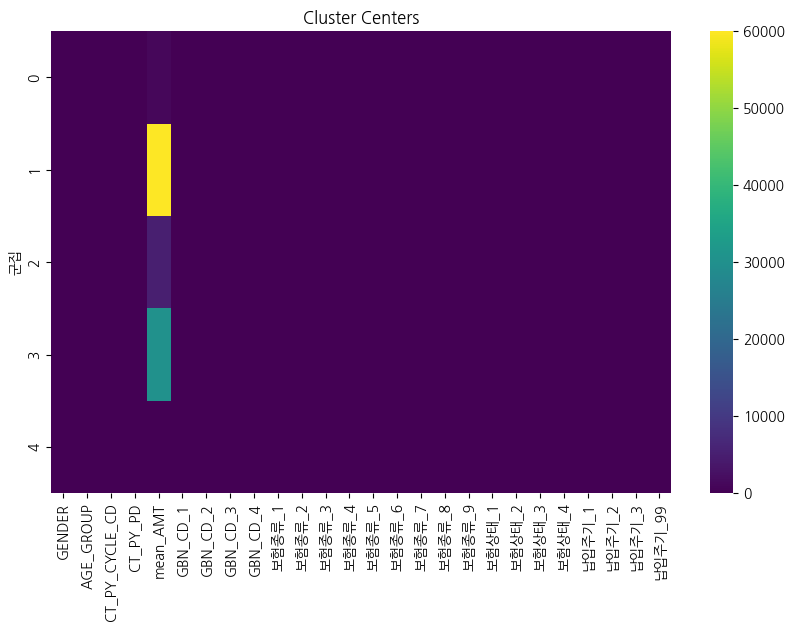

In [36]:
cluster_centers = fin_only0_1.groupby('군집').mean()
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers, cmap='viridis')
plt.title('Cluster Centers')
plt.show()

### 코사인 거리

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

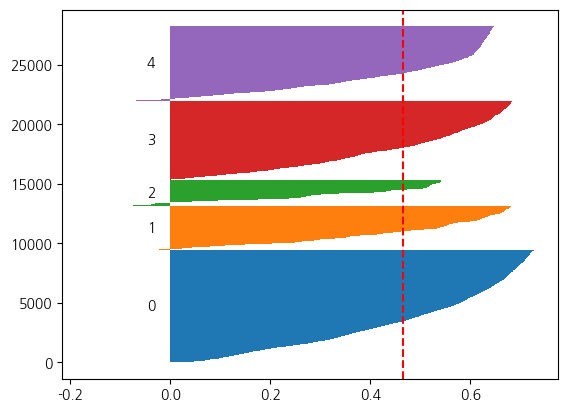

In [38]:
cosine_sim_only0_1 = cosine_similarity(fin_only0_1)

k=5

fig, ax = plt.subplots(1, 1)
kmeans_0_1 = KMeans(n_clusters=k, random_state=42).fit(cosine_sim_only0_1)
silhouette_vals = silhouette_samples(cosine_sim_only0_1, kmeans_0_1.labels_)
y_ticks = []
y_lower = y_upper = 0

for c_num in np.unique(kmeans_0_1.labels_):
    cluster_silhouette_vals = silhouette_vals[kmeans_0_1.labels_==c_num]
    y_upper += len(cluster_silhouette_vals)
    cluster_silhouette_vals.sort()

    ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    ax.text(-0.03, (y_lower + y_upper) / 2, str(c_num), ha='right', va='center')
    y_lower += len(cluster_silhouette_vals)
    
ax.axvline(np.mean(silhouette_vals), color="red", linestyle="--")

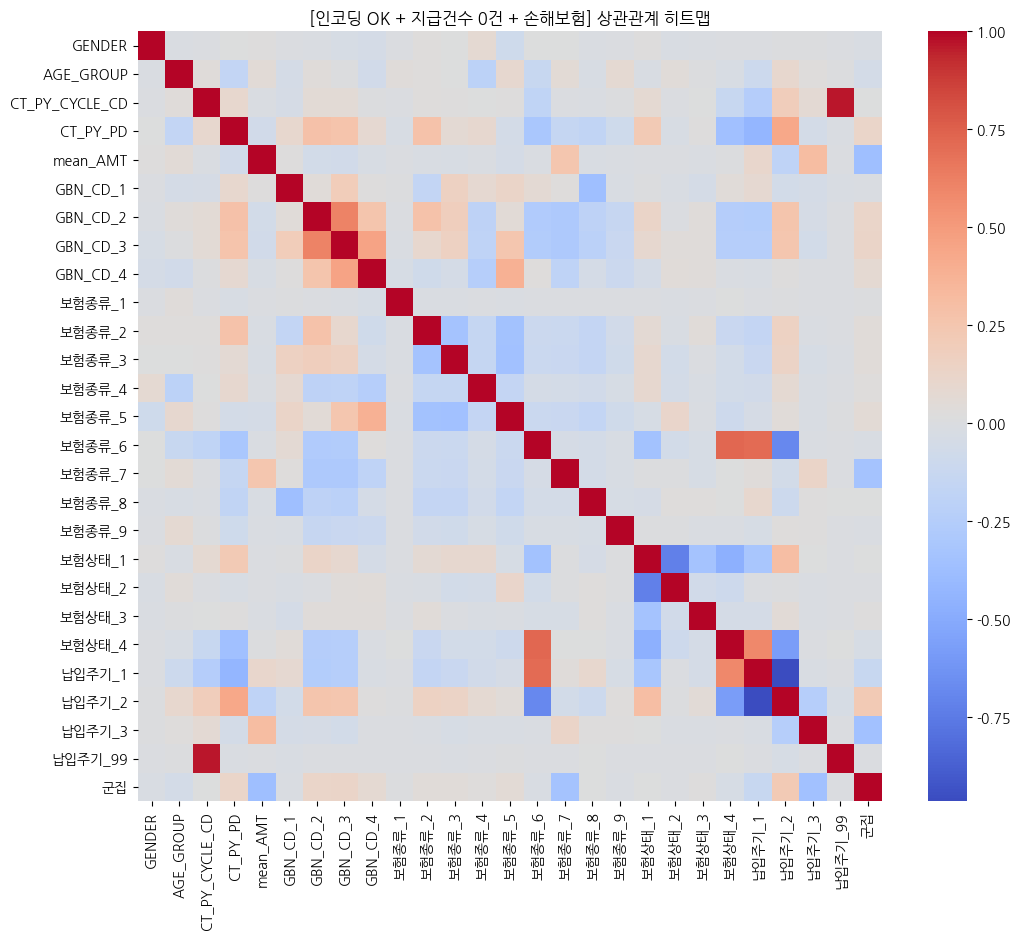

In [39]:
plt.figure(figsize=(12, 10))
sns.heatmap(fin_only0_1.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('[인코딩 OK + 지급건수 0건 + 손해보험] 상관관계 히트맵')
plt.show()

### (폐기) AMT 관련 컬럼 삭제

일단 손해보험만 확인

In [3]:
fin_no_amt = fin[fin['총지급 건수'] == 0]
fin_no_amt = fin_no_amt[fin_no_amt['업권'] == 1].reset_index(drop=True)
fin_no_amt.columns

Index(['JOIN_SN', 'POL_SN', 'GENDER', 'AGE_GROUP', 'reduce_GBN_CD',
       'reduce_STAT_CD', 'CT_CHNL_CD', 'CT_PY_AMT', 'CT_PY_CYCLE_CD',
       'CT_PY_PD', 'mean_AMT', 'GBN_CD_1', 'GBN_CD_2', 'GBN_CD_3', 'GBN_CD_4',
       '총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원',
       '화재/재물', '연령대_0', '연령대_1', '연령대_2', '연령대_3', '연령대_4', '연령대_5', '연령대_6',
       '연령대_7', '연령대_8', '보험종류_1', '보험종류_2', '보험종류_3', '보험종류_4', '보험종류_5',
       '보험종류_6', '보험종류_7', '보험종류_8', '보험종류_9', '보험상태_1', '보험상태_2', '보험상태_3',
       '보험상태_4', '채널_1', '채널_2', '채널_3', '채널_4', '채널_5', '채널_6', '채널_7',
       '채널_99', '납입주기_1', '납입주기_2', '납입주기_3', '납입주기_99', '성별_1', '성별_2', '업권'],
      dtype='object')

In [4]:
drop_col = ['JOIN_SN', 'POL_SN', 'mean_AMT', 'CT_PY_CYCLE_CD',
            'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD',
            'CT_PY_AMT', '업권', '총지급금액', '총지급 건수',
            '연령대_0', '연령대_1', '연령대_2', '연령대_3', '연령대_4', '연령대_5', '연령대_6',
            '연령대_7', '연령대_8', '채널_1', '채널_2', '채널_3', '채널_4', '채널_5', '채널_6', '채널_7', '채널_99', '성별_1', '성별_2',
            '기타', '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원', '화재/재물', '업권']

fin_no_amt = fin_no_amt.drop(columns=drop_col)
fin_no_amt.head()

,GENDER,AGE_GROUP,CT_PY_PD,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,납입주기_1,납입주기_2,납입주기_3,납입주기_99
0,1,4,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
1,1,6,10,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,1,2,20,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,1,5,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
4,2,5,20,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [5]:
k = 5
kmeans_noamt = KMeans(n_clusters=k, random_state=42)
kmeans_noamt.fit(fin_no_amt)

fin_no_amt['군집'] = kmeans_noamt.labels_
fin_no_amt.head()

,GENDER,AGE_GROUP,CT_PY_PD,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,납입주기_1,납입주기_2,납입주기_3,납입주기_99,군집
0,1,4,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1
1,1,6,10,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,2
2,1,2,20,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,4
3,1,5,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
4,2,5,20,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,4


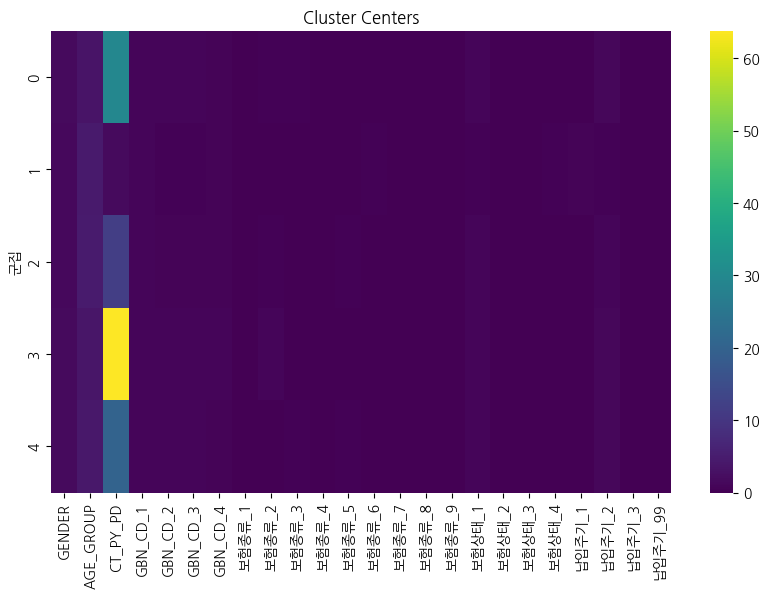

In [6]:
cluster_centers_noamt = fin_no_amt.groupby('군집').mean()
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers_noamt, cmap='viridis')
plt.title('Cluster Centers')
plt.show()

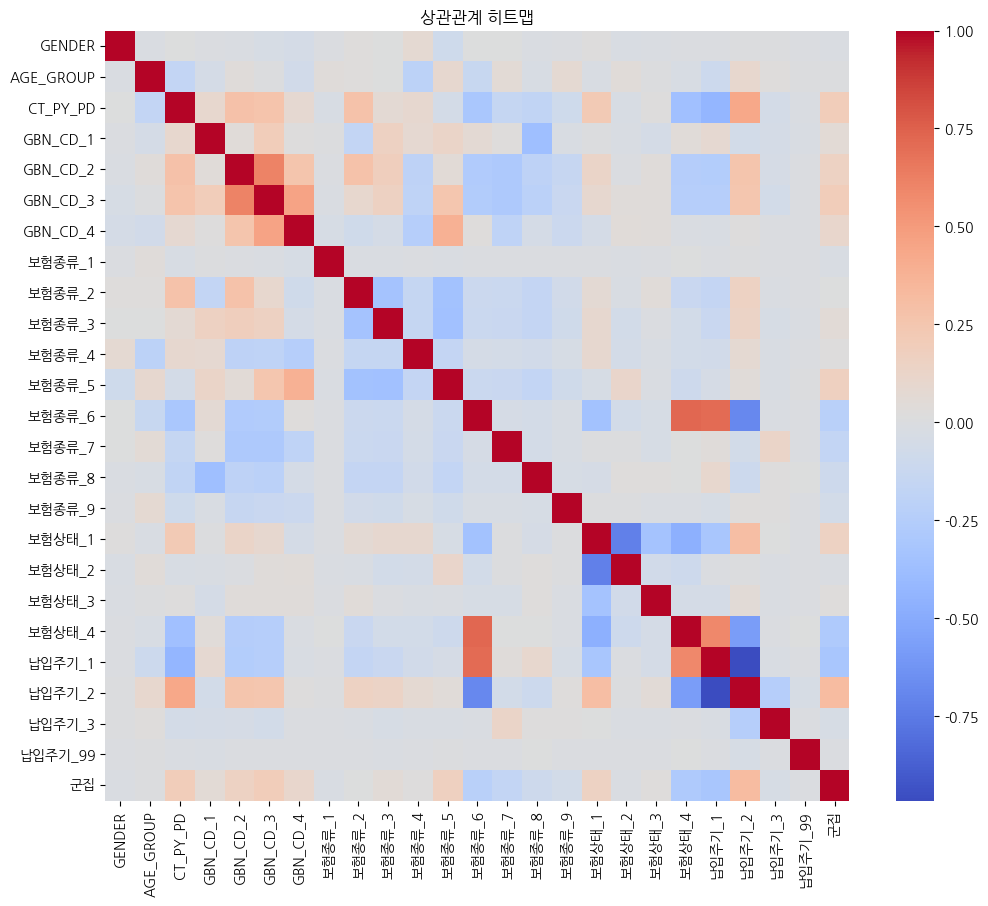

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(fin_no_amt.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('상관관계 히트맵')
plt.show()

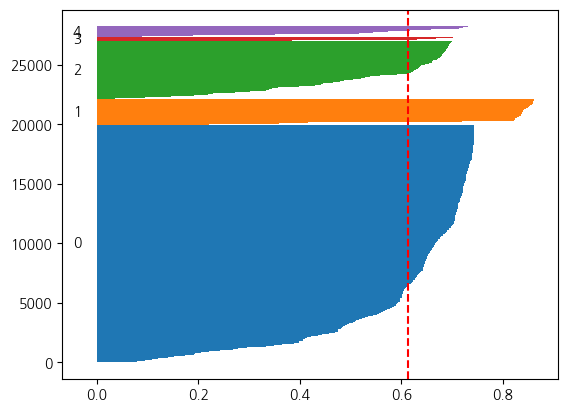

In [10]:
cos_noamt = cosine_similarity(fin_no_amt)

k=5

fig, ax = plt.subplots(1, 1)
kmeans_noamt = KMeans(n_clusters=k, random_state=42).fit(cos_noamt)
silhouette_vals = silhouette_samples(cos_noamt, kmeans_noamt.labels_)
y_ticks = []
y_lower = y_upper = 0

for c_num in np.unique(kmeans_noamt.labels_):
    cluster_silhouette_vals = silhouette_vals[kmeans_noamt.labels_==c_num]
    y_upper += len(cluster_silhouette_vals)
    cluster_silhouette_vals.sort()

    ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    ax.text(-0.03, (y_lower + y_upper) / 2, str(c_num), ha='right', va='center')
    y_lower += len(cluster_silhouette_vals)
    
ax.axvline(np.mean(silhouette_vals), color="red", linestyle="--")

## (2) 생명보험 = 2 (20341건)

In [5]:
fin_only0 = fin[fin['총지급 건수'] == 0]
fin_only0_2 = fin_only0[fin_only0['업권'] == 2].reset_index(drop=True)
fin_only0_2.head()

,JOIN_SN,POL_SN,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,연령대_0,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7,연령대_8,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,채널_1,채널_2,채널_3,채널_4,채널_5,채널_6,채널_7,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2,업권
0,15110,2197182,2,2,7,1,4,5000,1,0,5000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,2
1,56423,254040,2,2,1,1,1,170,2,5,170.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,2
2,657563,5707253,1,4,2,1,6,18,2,10,18.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,2
3,714478,6142305,1,7,2,1,6,17,2,10,17.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,2
4,575660,9524605,1,5,2,1,4,1300,2,20,1300.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,2


### 드랍 컬럼

In [6]:
drop_col = ['JOIN_SN', 'POL_SN', 'CT_CHNL_CD',
            'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD',
            'CT_PY_AMT', '업권', '총지급금액', '총지급 건수',
            '연령대_0', '연령대_1', '연령대_2', '연령대_3', '연령대_4', '연령대_5', '연령대_6',
            '연령대_7', '연령대_8', '기타', '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원', '화재/재물',
            '채널_1', '채널_2', '채널_3', '채널_4', '채널_5', '채널_6', '채널_7', '채널_99',
            '성별_1', '성별_2']

fin_only0_2 = fin_only0_2.drop(columns=drop_col)
fin_only0_2.head()

,GENDER,AGE_GROUP,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,납입주기_1,납입주기_2,납입주기_3,납입주기_99
0,2,2,1,0,5000.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
1,2,2,2,5,170.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,1,4,2,10,18.0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,1,7,2,10,17.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,1,5,2,20,1300.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


### KMeans (5개)

In [7]:
k = 5
kmeans_only0_2 = KMeans(n_clusters=k, random_state=42)
kmeans_only0_2.fit(fin_only0_2)

fin_only0_2['군집'] = kmeans_only0_2.labels_
fin_only0_2.head()

,GENDER,AGE_GROUP,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,납입주기_1,납입주기_2,납입주기_3,납입주기_99,군집
0,2,2,1,0,5000.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
1,2,2,2,5,170.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,1,4,2,10,18.0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,4
3,1,7,2,10,17.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,4
4,1,5,2,20,1300.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,3


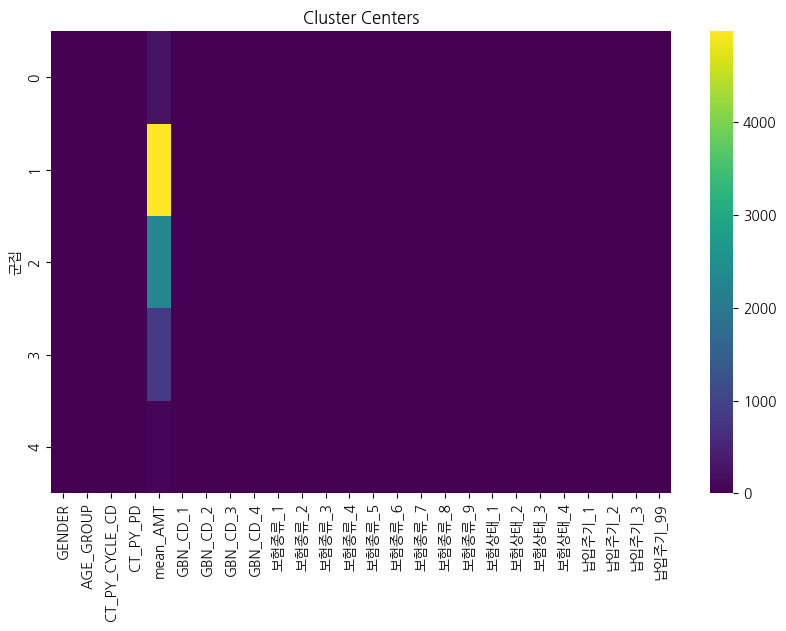

In [19]:
cluster_centers = fin_only0_2.groupby('군집').mean()
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers, cmap='viridis')
plt.title('Cluster Centers')
plt.show()

### 코사인 거리 (5개)

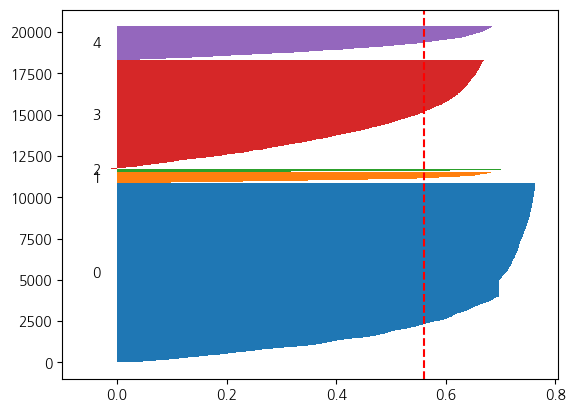

In [9]:
cosine_sim_only0_2 = cosine_similarity(fin_only0_2)

k=5

fig, ax = plt.subplots(1, 1)
kmeans_0_2 = KMeans(n_clusters=k, random_state=42).fit(cosine_sim_only0_2)
silhouette_vals = silhouette_samples(cosine_sim_only0_2, kmeans_0_2.labels_)
y_ticks = []
y_lower = y_upper = 0

for c_num in np.unique(kmeans_0_2.labels_):
    cluster_silhouette_vals = silhouette_vals[kmeans_0_2.labels_==c_num]
    y_upper += len(cluster_silhouette_vals)
    cluster_silhouette_vals.sort()

    ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    ax.text(-0.03, (y_lower + y_upper) / 2, str(c_num), ha='right', va='center')
    y_lower += len(cluster_silhouette_vals)
    
ax.axvline(np.mean(silhouette_vals), color="red", linestyle="--")

### 코사인 거리 (3개)

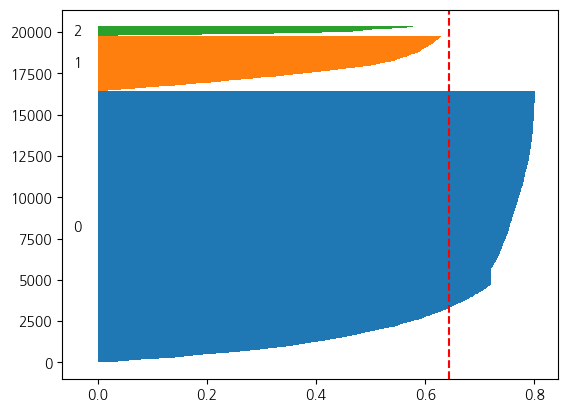

In [10]:
cosine_sim_only0_2 = cosine_similarity(fin_only0_2)

k=3

fig, ax = plt.subplots(1, 1)
kmeans_0_2 = KMeans(n_clusters=k, random_state=42).fit(cosine_sim_only0_2)
silhouette_vals = silhouette_samples(cosine_sim_only0_2, kmeans_0_2.labels_)
y_ticks = []
y_lower = y_upper = 0

for c_num in np.unique(kmeans_0_2.labels_):
    cluster_silhouette_vals = silhouette_vals[kmeans_0_2.labels_==c_num]
    y_upper += len(cluster_silhouette_vals)
    cluster_silhouette_vals.sort()

    ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    ax.text(-0.03, (y_lower + y_upper) / 2, str(c_num), ha='right', va='center')
    y_lower += len(cluster_silhouette_vals)
    
ax.axvline(np.mean(silhouette_vals), color="red", linestyle="--")

### 코사인 거리 (4개)

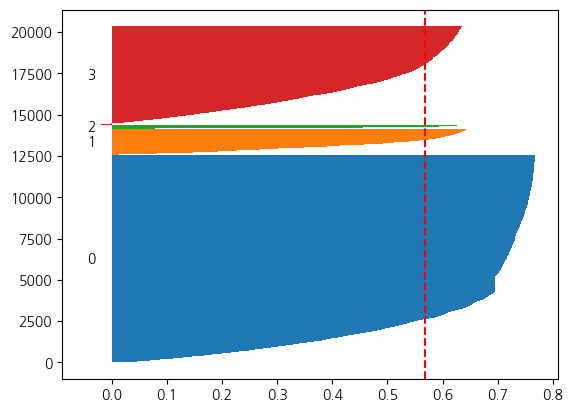

In [12]:
cosine_sim_only0_2 = cosine_similarity(fin_only0_2)

k=4

fig, ax = plt.subplots(1, 1)
kmeans_0_2 = KMeans(n_clusters=k, random_state=42).fit(cosine_sim_only0_2)
silhouette_vals = silhouette_samples(cosine_sim_only0_2, kmeans_0_2.labels_)
y_ticks = []
y_lower = y_upper = 0

for c_num in np.unique(kmeans_0_2.labels_):
    cluster_silhouette_vals = silhouette_vals[kmeans_0_2.labels_==c_num]
    y_upper += len(cluster_silhouette_vals)
    cluster_silhouette_vals.sort()

    ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    ax.text(-0.03, (y_lower + y_upper) / 2, str(c_num), ha='right', va='center')
    y_lower += len(cluster_silhouette_vals)
    
ax.axvline(np.mean(silhouette_vals), color="red", linestyle="--")

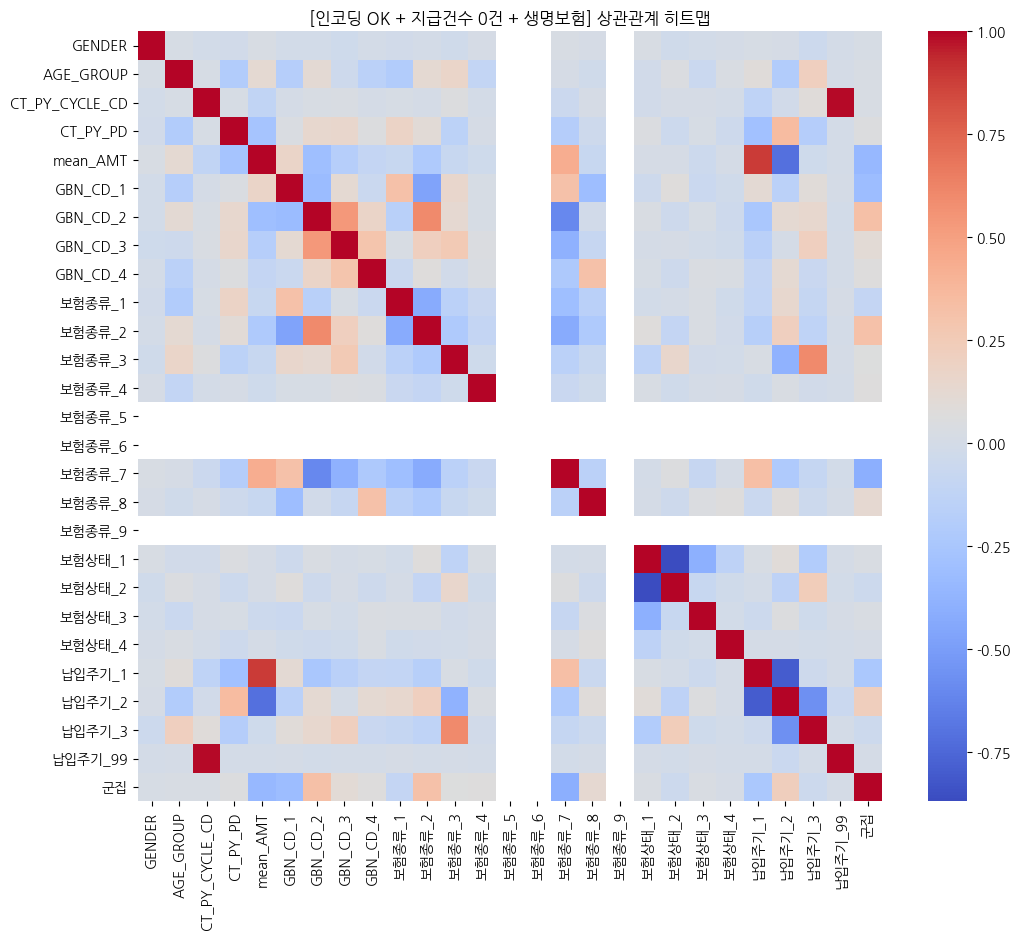

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(fin_only0_2.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('[인코딩 OK + 지급건수 0건 + 생명보험] 상관관계 히트맵')
plt.show()

## (3) 신협 = 0 (3623건)

In [17]:
fin_only0 = fin[fin['총지급 건수'] == 0]
fin_only0_0 = fin_only0[fin_only0['업권'] == 0].reset_index(drop=True)
fin_only0_0.head()

,JOIN_SN,POL_SN,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,연령대_0,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7,연령대_8,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,채널_1,채널_2,채널_3,채널_4,채널_5,채널_6,채널_7,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2,업권
0,1659127,5420542,2,4,7,1,5,180,2,3,180.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,798115,6197631,1,5,3,1,1,50,2,20,50.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,1023554,5005476,2,6,7,1,1,440,2,10,440.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,170502,9889265,2,3,1,1,1,15,2,20,15.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,589959,7408050,2,3,1,1,1,37,2,15,37.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### 드랍 컬럼

In [18]:
drop_col = ['JOIN_SN', 'POL_SN', 'CT_CHNL_CD',
            'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD',
            'CT_PY_AMT', '업권', '총지급금액', '총지급 건수',
            '연령대_0', '연령대_1', '연령대_2', '연령대_3', '연령대_4', '연령대_5', '연령대_6',
            '연령대_7', '연령대_8', '기타', '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원', '화재/재물',
            '채널_1', '채널_2', '채널_3', '채널_4', '채널_5', '채널_6', '채널_7', '채널_99',
            '성별_1', '성별_2']

fin_only0_0 = fin_only0_0.drop(columns=drop_col)
fin_only0_0.head()

,GENDER,AGE_GROUP,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,납입주기_1,납입주기_2,납입주기_3,납입주기_99
0,2,4,2,3,180.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
1,1,5,2,20,50.0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,2,6,2,10,440.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
3,2,3,2,20,15.0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,2,3,2,15,37.0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


### KMeans (5개)

In [19]:
k = 5
kmeans_only0_0 = KMeans(n_clusters=k, random_state=42)
kmeans_only0_0.fit(fin_only0_0)

fin_only0_0['군집'] = kmeans_only0_0.labels_
fin_only0_0.head()

,GENDER,AGE_GROUP,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,납입주기_1,납입주기_2,납입주기_3,납입주기_99,군집
0,2,4,2,3,180.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,1,5,2,20,50.0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,2,6,2,10,440.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,3
3,2,3,2,20,15.0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,2,3,2,15,37.0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


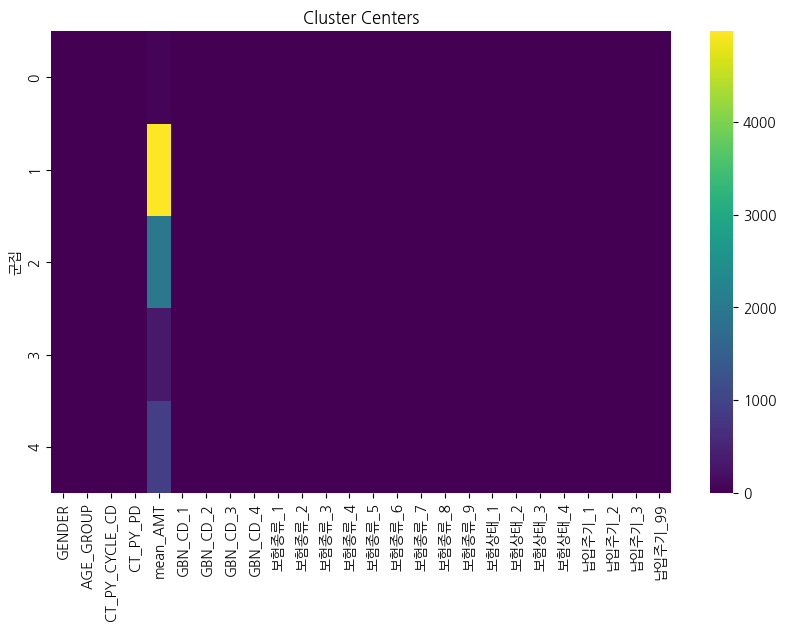

In [20]:
cluster_centers = fin_only0_0.groupby('군집').mean()
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers, cmap='viridis')
plt.title('Cluster Centers')
plt.show()

### 코사인 거리 (3~5개)

In [21]:
cosine_sim_only0_0 = cosine_similarity(fin_only0_0)

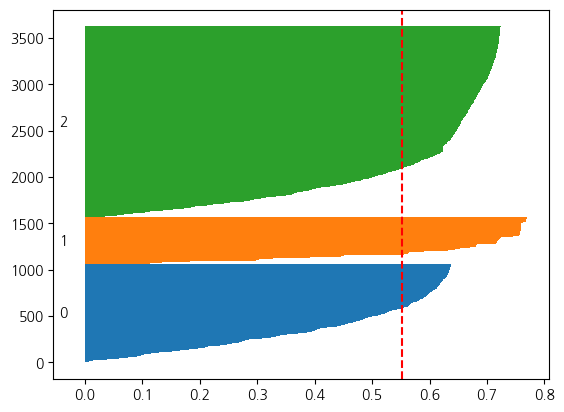

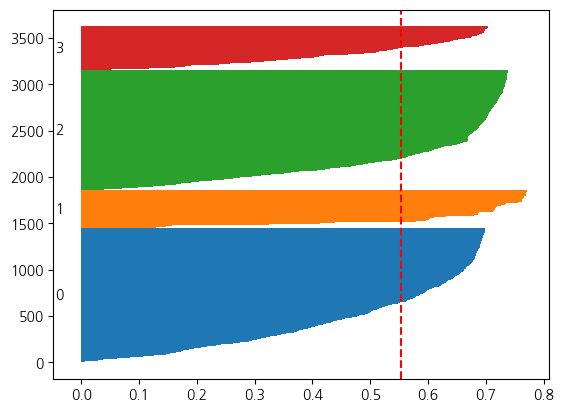

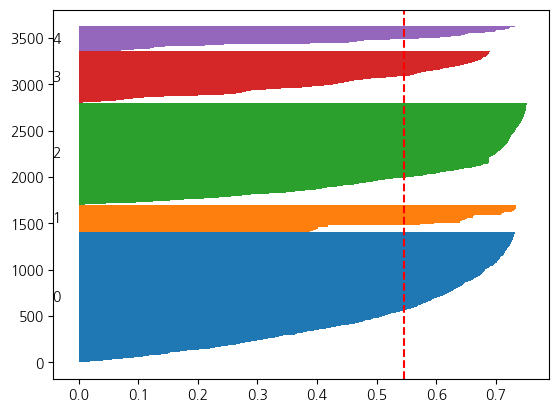

In [22]:
for k in range(3, 6):
    fig, ax = plt.subplots(1, 1)
    kmeans = KMeans(n_clusters=k, random_state=42).fit(cosine_sim_only0_0)
    silhouette_vals = silhouette_samples(cosine_sim_only0_0, kmeans.labels_)
    y_ticks = []
    y_lower = y_upper = 0

    for c_num in np.unique(kmeans.labels_):
        cluster_silhouette_vals = silhouette_vals[kmeans.labels_==c_num]
        y_upper += len(cluster_silhouette_vals)
        cluster_silhouette_vals.sort()

        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
        ax.text(-0.03, (y_lower + y_upper) / 2, str(c_num), ha='right', va='center')
        y_lower += len(cluster_silhouette_vals)
    
    ax.axvline(np.mean(silhouette_vals), color="red", linestyle="--")